## 인공신경망

In [6]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = \
keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [7]:
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [8]:
test_input.shape,test_target.shape

((10000, 28, 28), (10000,))

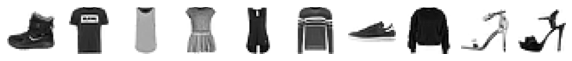

In [9]:
import matplotlib.pyplot as plt
fig,axs= plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [10]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [11]:
import numpy as np
np.unique(train_target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [12]:
train_scaled= train_input / 255.0
train_scaled= train_scaled.reshape(-1,28*28)

In [13]:
train_scaled.shape

(60000, 784)

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc= SGDClassifier(loss='log',max_iter=5,random_state=42)
scores= cross_validate (sc,train_scaled,train_target,n_jobs=-1)
np.mean(scores['test_score'])

0.8192833333333333

In [15]:
import tensorflow as tf

In [16]:
from tensorflow import keras

In [17]:
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled, train_target, test_size=0.2,random_state=42)

In [18]:
train_scaled.shape,train_target.shape

((48000, 784), (48000,))

In [20]:
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [21]:
model = keras.Sequential(dense)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [23]:
train_target[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [24]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.7944
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8388
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4488 - accuracy: 0.8486
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8518
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4284 - accuracy: 0.8548


In [25]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8466


[0.443939208984375, 0.8465833067893982]

## 심층신경망

In [26]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
train_scaled=train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [30]:
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')

In [31]:
model = keras.Sequential([dense1,dense2])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'),
    keras.layers.Dense(10,activation='softmax',name='output')
],name='패션 MNIST모델')

In [34]:
model.summary()

Model: "패션 MNIST모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
model= keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [37]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5690 - accuracy: 0.8056
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4117 - accuracy: 0.8512
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3775 - accuracy: 0.8640
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3531 - accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3371 - accuracy: 0.8780


In [64]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [66]:
(train_input,train_target),(test_input,test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input / 255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [67]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

In [44]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3581 - accuracy: 0.8799


[0.3581184446811676, 0.8799166679382324]

In [47]:
model= keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5292 - accuracy: 0.8166
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3958 - accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3531 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3059 - accuracy: 0.8888


In [48]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8787


[0.3447149693965912, 0.8786666393280029]

## 신경망 모델 훈련

In [49]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled, train_target,test_size=0.2,random_state=42)

In [60]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
        print('a')
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model


In [61]:
model = model_fn
model

<function __main__.model_fn(a_layer=None)>

In [56]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)

AttributeError: 'function' object has no attribute 'compile'

In [69]:
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)

In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

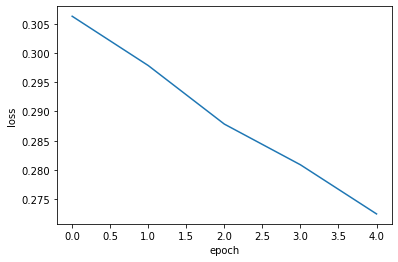

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

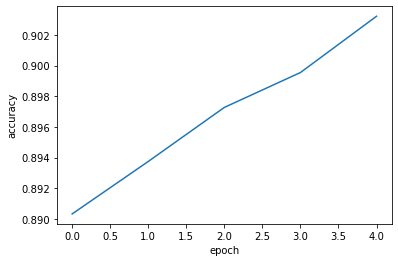

In [72]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

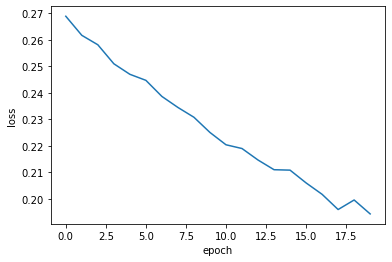

In [73]:
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()